In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
train_data = pd.read_csv('train_dataset.csv')
test_data = pd.read_csv('test_dataset.csv')

In [0]:
train_data = train_data[['a','y']]
test_data = test_data[['a','y']]

In [0]:
#Hypothesis Structure Y = b0 + b1*X
def hypothesis(b0,b1,x):
  return b0 + (b1 * x)

In [0]:
#Compute best parameter using OLS like B0 and B1
def find_best(x,y):
  m = len(x) 
  numer= 0
  denom= 0
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  for i in range(m):
    numer += (x[i]-mean_x) * (y[i]-mean_y)
    denom += (x[i]-mean_x) ** 2 
  b1 = numer/denom
  b0 = mean_y - (b1 * mean_x)
  return b0 ,b1 

In [0]:
def plot_line(b0, b1, x, y):
    max_x = np.max(x)
    min_x = np.min(x)
    # Compute line interpolation points
    xplot = np.linspace(min_x, max_x, 1000)
    yplot = b0 + b1 * xplot
    # Plot fitted line and points
    plt.plot(xplot, yplot, color='#58b970', label='Regression Line')
    plt.scatter(x,y, c='#ef5423', label='Scatter Plot')
    # Plot info
    plt.xlabel('a')
    plt.ylabel('y')
    plt.legend()
    plt.show()

In [0]:
x = train_data['a'].values
y = train_data['y'].values

In [0]:
b0 ,b1 = find_best(x,y)

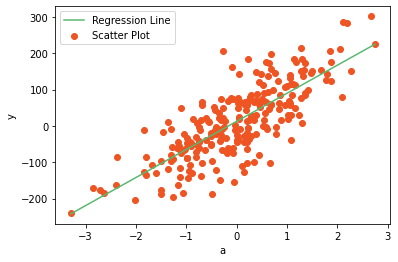

In [45]:
plot_line(b0,b1,x,y)

In [0]:
#RMSE
def rmse(y,y_pred):
  rmse = np.sqrt(np.sum((y_pred - y)**2) / len(y))
  return rmse

In [0]:
# R2 Score
# How much(%) of the total variation in y is explained by variation in x(fitted line)
def r2score(y,y_pred):
  mean_y = np.mean(y)
  SE_total_variation = np.sum((y - mean_y)**2) # Unexplained max possible variation in y wrt->Mean
  SE_line_variation = np.sum((y - y_pred)**2) # Unexplained variation in y wrt -> fitted line
  r2 = 1 - (SE_line_variation / SE_total_variation) # Expalined = 1 - Unexplained
  return r2

In [0]:
y_pred = hypothesis(b0, b1, x)

In [52]:
print(f"RMSE = {rmse(y, y_pred)}")
print(f"R2_score = {r2score(y, y_pred)}")

RMSE = 63.085834608693574
R2_score = 0.6125432469546614


In [55]:
y_pred_test = hypothesis(b0, b1, test_data['a'].values)

print(f"RMSE = {rmse(test_data['y'].values, y_pred_test)}")
print(f"R2_score = {r2score(test_data['y'].values, y_pred_test)}")

RMSE = 61.29128502384794
R2_score = 0.6676155525164718
